# Создание ETL процесса

ETL (от англ. Extract, Transform, Load — дословно «извлечение, преобразование, загрузка») — один из основных процессов в управлении хранилищами данных, который включает в себя:

    • извлечение данных из внешних источников;
    • их трансформация и очистка, чтобы они соответствовали потребностям бизнес-модели;
    • и загрузка их в хранилище данных.
    
Есть ETL, а есть ELT - это почти одно и то же, но с некоторым нюансом. ELT более современная вариация парадигмы ETL. Основное отличие в том, что перед трансформацией данные загружаются в хранилище в исходном виде (в стейджинговый слой). Этап трансформации происходит при переносе данных из стейджингового слоя в детальный слой.

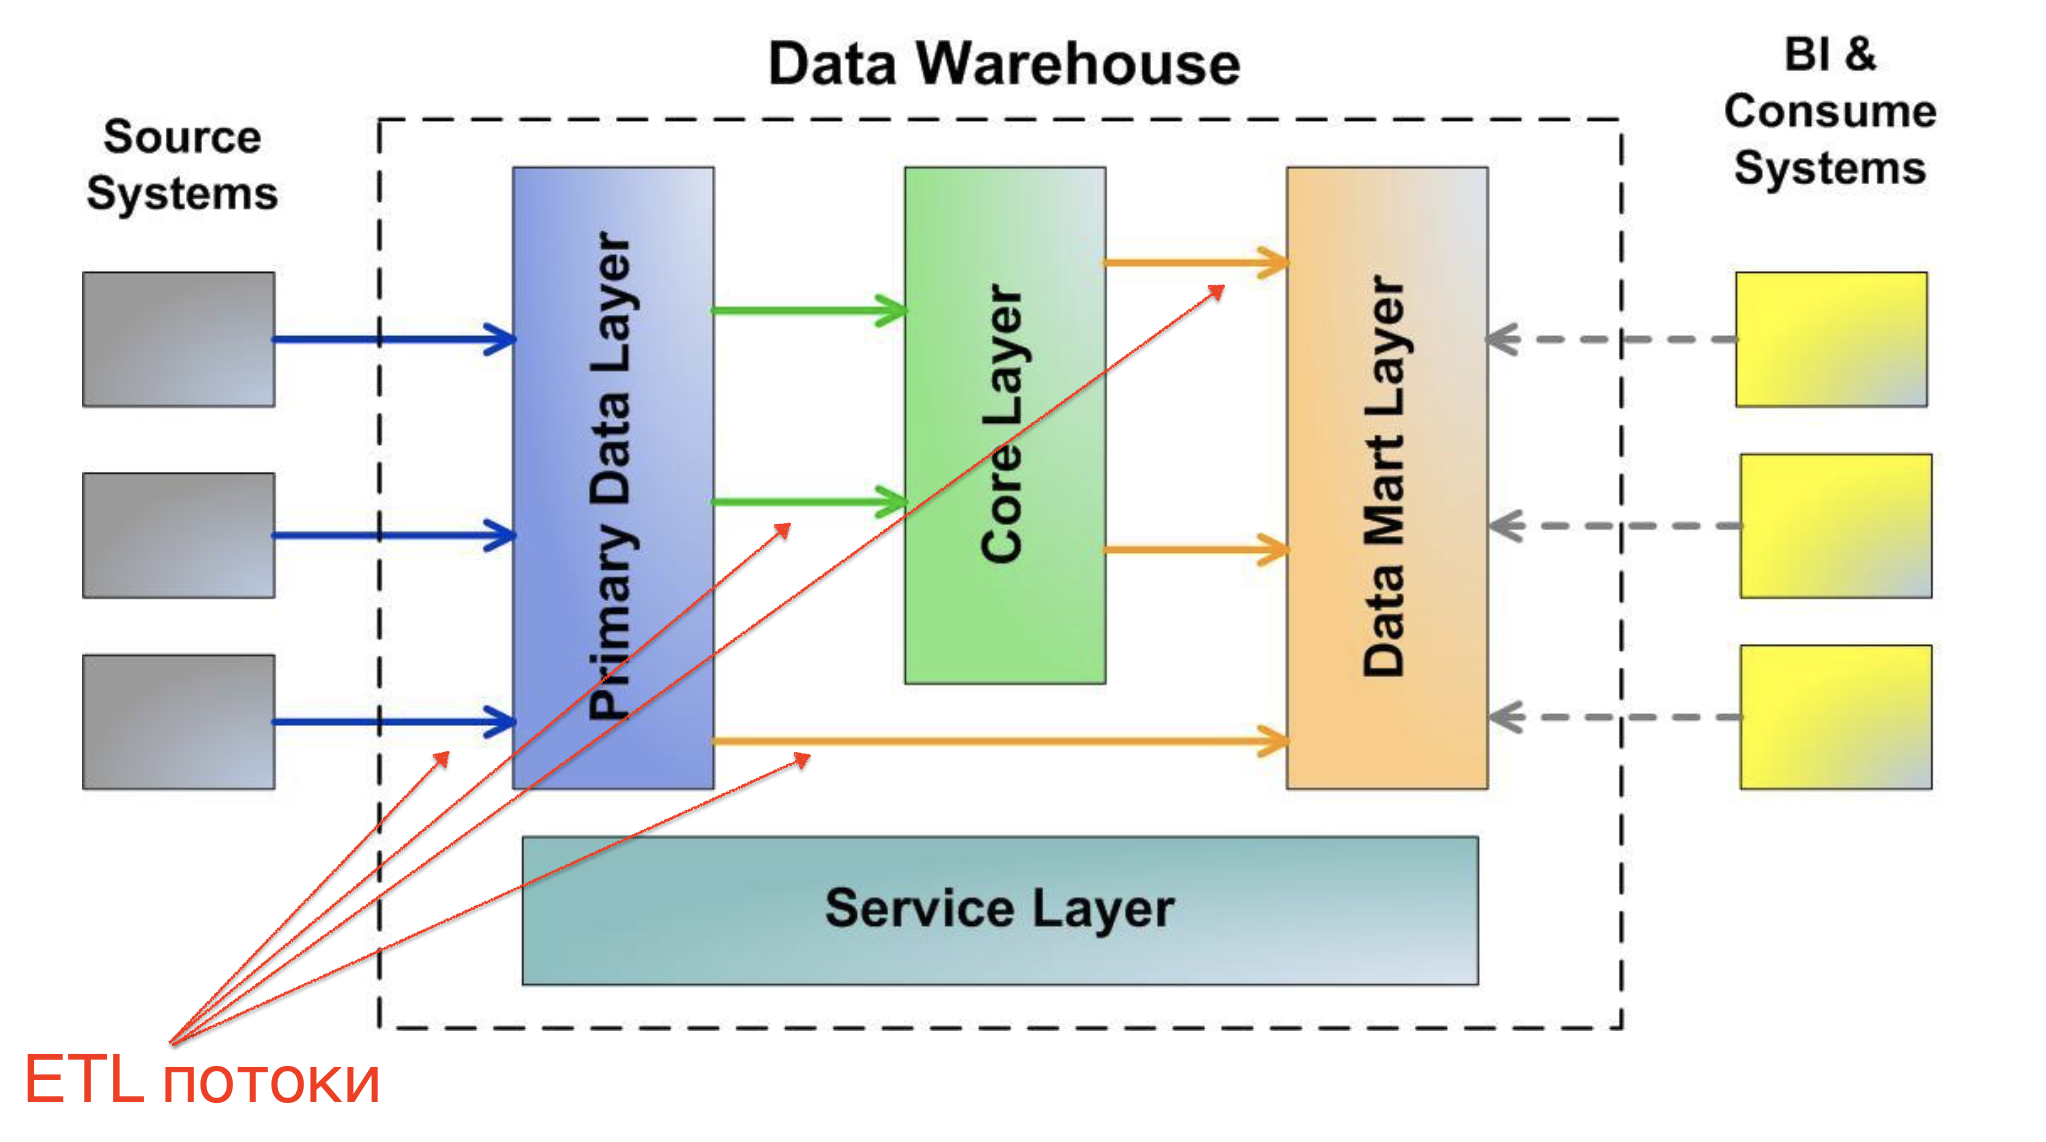

Существует несколько видов извлечения данных из систем источников:

    • Полная (dump) — логически проще, но требует больше ресурсов;
    • Инкрементальная — сложнее в реализации, но экономнее.

После извлечения и загрузки данных в хранилище, зачастую требуется трансформация (обработка) данных. Это нужно для приведения их к виду, наиболее удобному для последующего анализа. При этом должны учитываться некоторые выдвигаемые аналитиком требования, в частности, к уровню качества данных.

В процессе преобразования данных в рамках ETL чаще всего выполняются следующие операции:

    • преобразование типов данных;
    • агрегирование данных;
    • перевод значений;
    • создание новых данных;
    • очистка данных;
    • генерация суррогатных ключей.

Разработка ETL процесса по шагам:

    1) Планирование ETL-процесса, которое включает в себя разработку диаграммы потоков данных от систем-источников, определение преобразований, метода генерации ключей и последовательности операций для каждой таблицы назначения.

    2) Конструирование процесса заполнения сущностей, в которых генерируются суррогатные ключи
        • В случае Кимбалла - таблиц измерений
        • В случае DV/AM – хабов/якорей
    А также разработка и верификацию механизмов изменения для каждой таблицы.

    3) Конструирование процесса заполнения сущностей, в которых используются сгенерированные ключи
        • В случае Кимбалла — таблиц фактов
        • В случае DV/AM – таблиц линков и сателлитов / связей и атрибутов

    4) Документирование процессов ETL и данных

Для того чтобы эффективно сопровождать и обслуживать ETL процессы, нужно хранить метаданные. Метаданные – данные о данных. Метаданные:

    • описывают признаки, свойства и состояния тех или иных сущностей (процессов, таблиц);

    • позволяют автоматически искать и управлять ими в больших информационных потоках (корректность и полнота).
Основные задачи: логирование, мониторинг, аудит.

Необходимый минимум полей метаданных:

    • дата и время обработки данных ETL-процессом;
    • уникальный идентефикатор действия (загрузка, транфсормация) над данными в пределах одного потока.

Основные свойства ETL процесса:
    
    1) Оптимизированность
    
    2) Периодичность
    Процесс ETL является необходимой составной частью эксплуатации ХД.
    Периодичность процесса ETL определяется не только потребностью пользователя в своевременных данных, но и размером загружаемой порции данных.
    
    3) Полнота
    Процесс ETL должен обеспечивать полноту и качество данных. Ничего не должен быть ни потеряно, ни забыто, ни испорчено.
    
    4) Консистентность
    Во время процесса ETL может произойти сбой, поэтому необходимо обеспечивать контроль за поступлением данных в ХД (откаты, мониторинги, уведомления).

Исходя из всего вышеперечисленного, можно сделать вывод что ETL процесс это совокупность многих атомарных операций над данными, каждая из которых выполняет свою функцию. Для решения подобных задач существуют готовые решения из коробки (SAS Data Integration Studio, Informatica Power Center, Microsoft SQL Server Integration Services и тд). Из плюсов таких решений можно отметить:

    • Быстрая разработка
    • Разрабатывать могут не только программисты (дешево)
    • Есть хранилище метаданных, автоматически генерируют метаданные => Есть анализ зависимостей
    • Есть встроенный планировщик
    • Наглядное представление потоков данных

**Интерфейс Informatica Power Center**
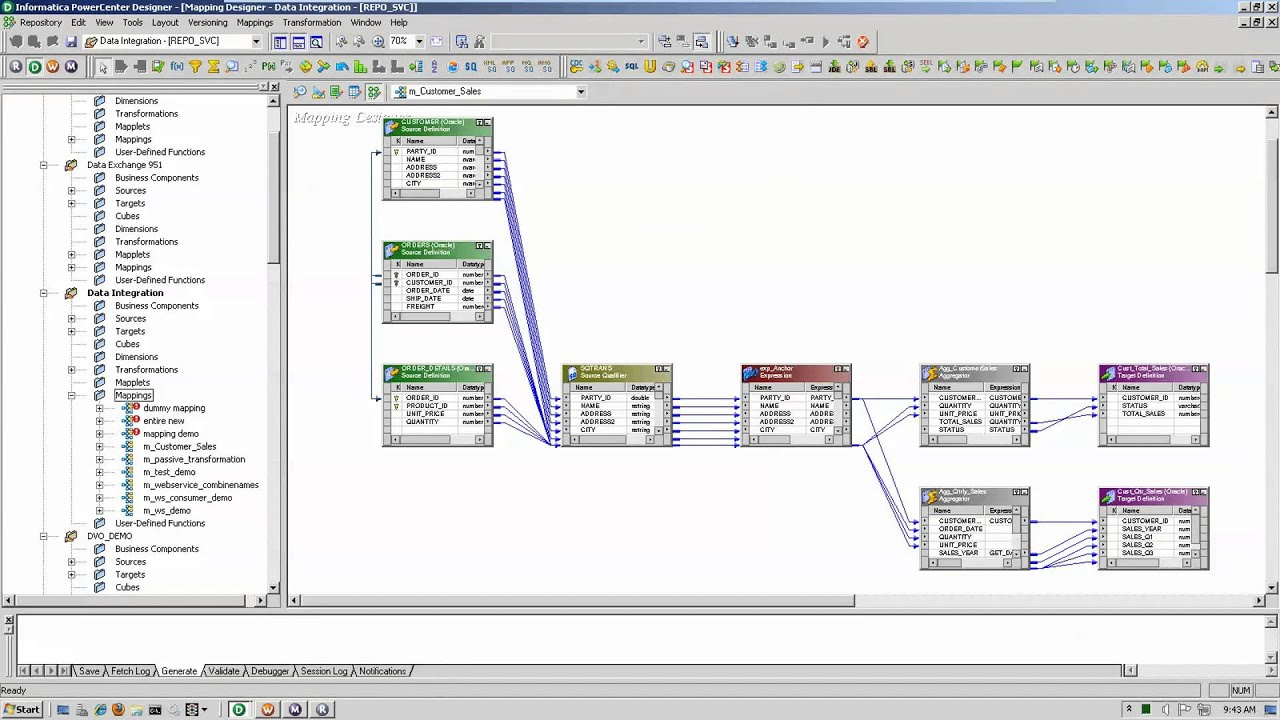

Одако, рукописный ETL с помощью каких-либо языков програмирования все же предпочтительнее:

    • неограниченная гибкость и кастомизация
    • не нужно платить за лицензии
    • техническая поддержка на местах (ответа от поставщика "коробочных" решений можно ждать очень долго)
    • развитие навыков разработки (безусловный плюс для специалиста)

# Разворачиваем окружение

В практических занятяих мы будем использовать следующие технологии: 

    • Python 3.x
    • Docker
    • Postgres 11
    • Airflow

Docker — это платформа, которая предназначена для разработки, развёртывания и запуска приложений в контейнерах.
Образы — это неизменные шаблоны, которые используются для создания одинаковых контейнеров. 
В образе контейнера Docker содержится образ базовой операционной системы, код приложения, библиотеки, от которого оно зависит. Всё это скомпоновано в виде единой сущности, на основе которой можно создать контейнер.
Для того чтобы запустить контейнер, нам нужен, во-первых, образ контейнера, во-вторых — среда, в которой установлен Docker, способная понять команду вида docker run image_name. Эта команда создаёт контейнер из образа и запускает его.

Скачивание докера: https://docs.docker.com/get-docker/.

Для того чтобы развернуть Postgres в контейнере нужно:

    • создать две директории с файлами docker-compose.yml со следующим содержимым: 

    • запустить контейнеры из соответсвующих директорий
>docker-compose up -d

    • проверяем состояние контейнеров
> docker ps

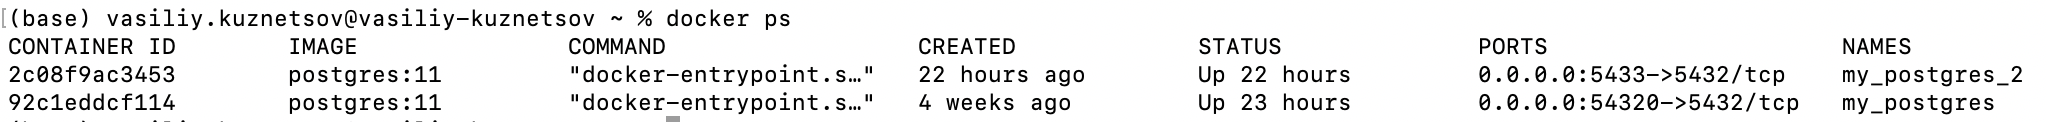

Для работы с бд создадим в каждом инстансе базу
>docker exec -it my_postgres psql -U root -c "create database my_database"

### Синтезируем данные из теста TPC-H

Клонируем репозиторий
>git clone https://github.com/gregrahn/tpch-kit.git

В папке tpch-kit/dbgen находится ddl таблиц 

Копируем файл dss.ddl в контейнер
>docker cp ./dss.ddl my_postgres:/

Создаем таблицы из ddl файла
>docker exec -it my_postgres psql my_database -f dss.ddl

В директории tpch-kit/dbgen находится Makefile, нужно отредактировать его под параметры вашей системы. Ищем следующие параметры и меняем параметр операционной системы (MACHINE=LINUX) на вашу

Компилируем программу для синтеза данных
>make Makefile
<br>make

Генерируем данные
> ./dbgen -vf -s 1

Копируем получившиеся данные в контейнер
>docker cp ./customer.tbl my_postgres:/
<br>docker cp ./lineitem.tbl my_postgres:/
<br>docker cp ./nation.tbl my_postgres:/
<br>docker cp ./orders.tbl my_postgres:/
<br>docker cp ./part.tbl my_postgres:/
<br>docker cp ./partsupp.tbl my_postgres:/
<br>docker cp ./region.tbl my_postgres:/
<br>docker cp ./supplier.tbl my_postgres:/

Загружаем данные в базу с помощью команды copy (https://www.postgresql.org/docs/11/sql-copy.html)
>docker exec -it my_postgres psql my_database -c "\\copy customer FROM '/customer.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy lineitem FROM '/lineitem.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy nation FROM '/nation.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy orders FROM '/orders.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy part FROM '/part.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy partsupp FROM '/partsupp.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy region FROM '/region.tbl' CSV DELIMITER '|'"
<br>docker exec -it my_postgres psql my_database -c "\\copy supplier FROM '/supplier.tbl' CSV DELIMITER '|'"

# Пишем ETL

Один инстанс postgres будем использовать как систему источник, а другой как целевое хранилище. Первый шаг любого etl процесса - извлечение данных. Данные можно выгрузить либо, в оперативную память, либо на диск в виде файла.

Схематично этап извлечения-загрузки можно изобразить следующим образом:

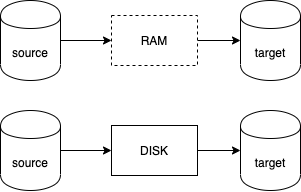

Хорошей практикой будет являться извлечение данных на диск. Рассмотрим преимущества этого подхода:

    1) Атомарность каждой операции. 
    При возникновении ошибок вставки, данные из оперативной памяти будут утеряны, а транзакция откачена. На больших наборах данных это влечет за собой трату большого количества времени.

    2) Скорость загрузки и ресурсоемкость.
    На больших обьемах данных не получиться извлечь полностью таблицу в оперативную память, придется грузить чанками. Загрузка одного файла средставми СУБД происходит в разы быстрее чем запись многих чанков.

Для работы с БД через питон будем использовать Python DB-API. Это не конкретная библиотека, а набор правил, которым подчиняются отдельные модули, реализующие работу с конкретными базами данных. Отдельные нюансы реализации для разных баз могут отличаться, но общие принципы позволяют использовать один и тот же подход при работе с разными базами данных.

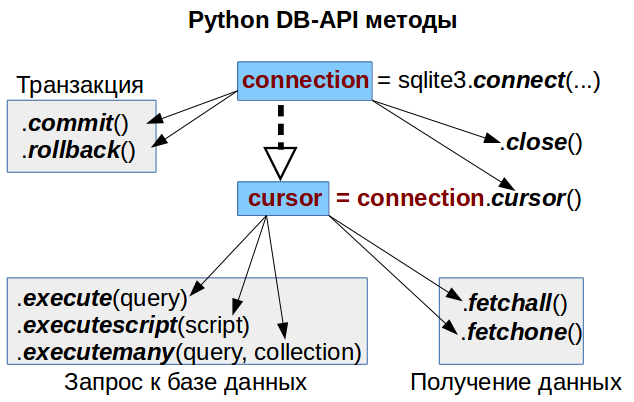

Предварительно установим библиотеку для работы с postgre https://pypi.org/project/psycopg2/:
> pip install psycopg2

Соединение с базой, получение курсора:

In [2]:
import psycopg2

# Параметры соединения
conn_string= "host='localhost' port=54320 dbname='tpch' user='postgres' password='postgres'" 

# Создаем соединение (оно поддерживает контекстный менеджер, рекомендую пользоваться им)
# Создаем курсор - это специальный объект который делает запросы и получает их результаты
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    query = 'select * from customer limit 1' # запрос к БД
    cursor.execute(query) # выполнение запроса
    result = cursor.fetchall() # получение результата
    print(result)

[(1, 'Customer#000000001', 'IVhzIApeRb ot,c,E', 15, '25-989-741-2988', Decimal('711.56'), 'BUILDING  ', 'to the even, regular platelets. regular, ironic epitaphs nag e')]


Запись в базу:

In [3]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='tpch' user='postgres' password='postgres'" 

with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    row = (-999, 'name', 'address', 0, 'phone', 0, 'mktsegment', 'comment') # кортеж для вставки
    insert = """
    insert into customer (
           c_custkey   
         , c_name      
         , c_address   
         , c_nationkey 
         , c_phone     
         , c_acctbal   
         , c_mktsegment
         , c_comment
    )
    values
    ({values})
    """.format(
    # биндим параметры в строку, чтобы избежать sql-иньекций (best practice)
    values=cursor.mogrify("%s, %s, %s, %s, %s, %s, %s, %s", row).decode('utf-8')
    )
    print('sql запрос:', insert)
    cursor.execute(insert)
    conn.commit() # комитим транзакцию
    cursor.execute('select * from customer where c_custkey < 0')
    result = cursor.fetchall()
    print('результат вставки:', result)

sql запрос: 
    insert into customer (
           c_custkey   
         , c_name      
         , c_address   
         , c_nationkey 
         , c_phone     
         , c_acctbal   
         , c_mktsegment
         , c_comment
    )
    values
    ( -999, 'name', 'address', 0, 'phone', 0, 'mktsegment', 'comment')
    
результат вставки: [(-999, 'name', 'address', 0, 'phone          ', Decimal('0.00'), 'mktsegment', 'comment')]


Зная базовые принципы работы с бд через питон, напишем etl процесс дампа таблицы customer:

In [4]:
import psycopg2

conn_string= "host='localhost' port=54320 dbname='tpch' user='postgres' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY customer TO STDOUT WITH DELIMITER ',' CSV HEADER;"
    with open('resultsfile.csv', 'w') as f:
        cursor.copy_expert(q, f)

Проверим как прошло извлечение данных с помощью pandas:

In [5]:
import pandas as pd

pd.read_csv('resultsfile.csv')

,c_custkey,c_name,c_address,c_nationkey,c_phone,c_acctbal,c_mktsegment,c_comment
0,1,Customer#000000001,"IVhzIApeRb ot,c,E",15,25-989-741-2988,711.56,BUILDING,"to the even, regular platelets. regular, ironi..."
1,2,Customer#000000002,"XSTf4,NCwDVaWNe6tEgvwfmRchLXak",13,23-768-687-3665,121.65,AUTOMOBILE,l accounts. blithely ironic theodolites integr...
2,3,Customer#000000003,MG9kdTD2WBHm,1,11-719-748-3364,7498.12,AUTOMOBILE,"deposits eat slyly ironic, even instructions...."
3,4,Customer#000000004,XxVSJsLAGtn,4,14-128-190-5944,2866.83,MACHINERY,"requests. final, regular ideas sleep final accou"
4,5,Customer#000000005,KvpyuHCplrB84WgAiGV6sYpZq7Tj,3,13-750-942-6364,794.47,HOUSEHOLD,n accounts will have to unwind. foxes cajole a...
...,...,...,...,...,...,...,...,...
149996,149997,Customer#000149997,ufK xSg6NRC8QaunPB7J,21,31-694-123-5061,8936.21,MACHINERY,xes haggle carefully slow platelets. slyly reg...
149997,149998,Customer#000149998,"NaDi,1fCNPDTntnVUjGyUJ8TrlIeYNK7v",2,12-860-414-6024,5952.41,BUILDING,"ideas cajole slyly around the even, pending f..."
149998,149999,Customer#000149999,nBpZoYhCPFKZqSunxdeHtRN08x3RE8hqh,1,11-401-828-7411,6104.03,AUTOMOBILE,s haggle about the final foxes. carefully spec...
149999,150000,Customer#000150000,DD7m6OBUJqlbTpiYmzK9SYuJBG266UKoAsKH,10,20-354-401-2016,2530.68,AUTOMOBILE,kages nag quickly for the regular theodolites....


Загрузим данные в наше хранилище:

In [6]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='admin' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    q = "COPY customer from STDIN WITH DELIMITER ',' CSV HEADER;"
    with open('resultsfile.csv', 'r') as f:
        cursor.copy_expert(q, f)

Проверим результат работы скрипта:

In [7]:
import psycopg2

conn_string= "host='localhost' port=5433 dbname='my_database2' user='admin' password='postgres'" 
with psycopg2.connect(conn_string) as conn, conn.cursor() as cursor:
    cursor.execute('select count(*) from customer limit 1')
    print(cursor.fetchall())

[(300001,)]


Подведем итоги:

    • познакомились с понятием ETL
    • узнали основные свойства и требования к ETL процессам
    • научились разворачивать СУБД в докере
    • познакимились с python DB-API
    • потренировались писать ETL процесс с помощью psycopg2

Источники:

    • https://www.psycopg.org/docs/cursor.html
    • https://habr.com/ru/post/321510/
    • https://docs.docker.com/get-started/overview/

## Домашнее задание

1) Развернуть всю архитектуру у себя
<br>2) Написать ETL процесс для загрузки ВСЕХ таблиц из postgres-источника в postgres-приемник